# Import Library

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu

# Nomor 1

In [2]:
image = cv2.imread("Foto Nama.jpg")

In [3]:
print(image.shape)
print(image.dtype)

(1200, 1600, 3)
uint8


In [4]:
b = image [:,:,0]
g = image [:,:,1]
r = image [:,:,2]

In [5]:
(baris, kolom)= image.shape[:2]

(-0.5, 1599.5, 1199.5, -0.5)

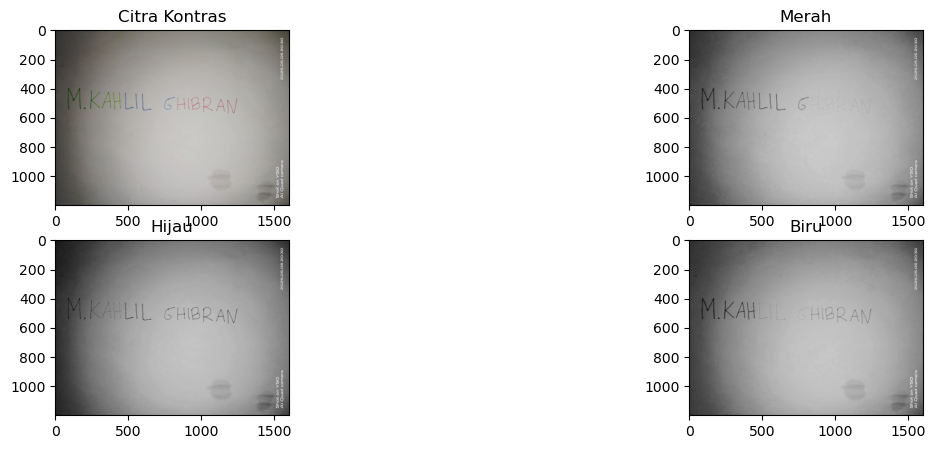

In [6]:
B, G, R = cv2.split(image)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(2,2, figsize=(15,5))

axs[0,0].imshow(image_rgb)
axs[0,0].set_title("Citra Kontras")
axs[0,0].axis('on')

axs[0,1].imshow(R, cmap='gray')
axs[0,1].set_title("Merah")
axs[0,1].axis('on')

axs[1,0].imshow(G, cmap='gray')
axs[1,0].set_title("Hijau")
axs[1,0].axis('on')

axs[1,1].imshow(B, cmap='gray')
axs[1,1].set_title("Biru")
axs[1,1].axis('on')

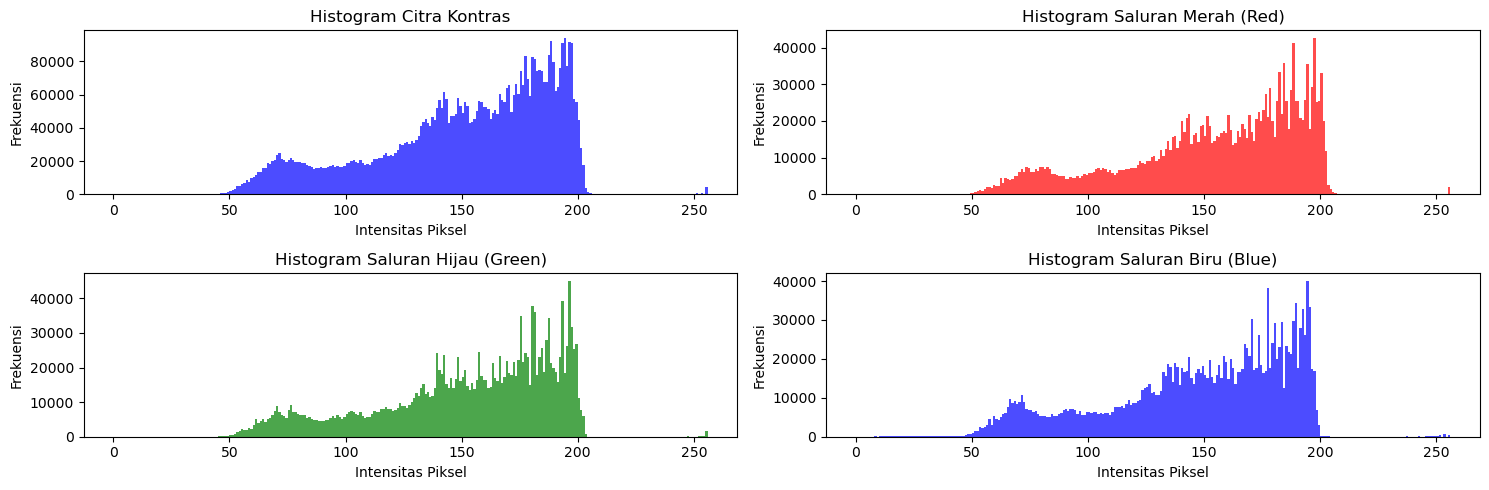

In [7]:
fig_hist, axs_hist = plt.subplots(2, 2, figsize=(15, 5))

axs_hist[0, 0].hist(image_rgb.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
axs_hist[0, 0].set_title("Histogram Citra Kontras")
axs_hist[0, 0].set_xlabel("Intensitas Piksel")
axs_hist[0, 0].set_ylabel("Frekuensi")

axs_hist[0, 1].hist(R.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
axs_hist[0, 1].set_title("Histogram Saluran Merah (Red)")
axs_hist[0, 1].set_xlabel("Intensitas Piksel")
axs_hist[0, 1].set_ylabel("Frekuensi")

axs_hist[1, 0].hist(G.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
axs_hist[1, 0].set_title("Histogram Saluran Hijau (Green)")
axs_hist[1, 0].set_xlabel("Intensitas Piksel")
axs_hist[1, 0].set_ylabel("Frekuensi")

axs_hist[1, 1].hist(B.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
axs_hist[1, 1].set_title("Histogram Saluran Biru (Blue)")
axs_hist[1, 1].set_xlabel("Intensitas Piksel")
axs_hist[1, 1].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

# Nomor 2

# Ambang Batas Citra Blue

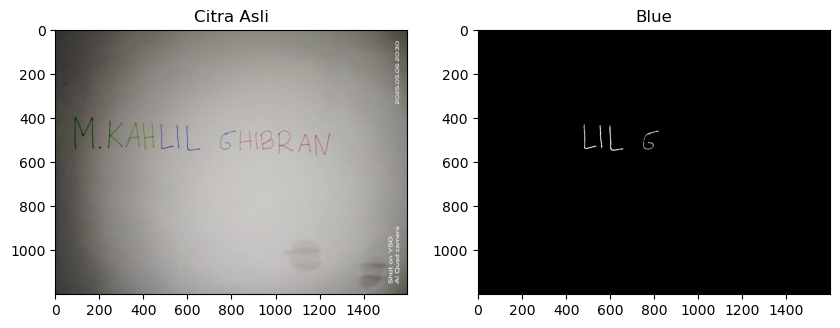

In [8]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)

hasil = cv2.bitwise_and(image, image, mask=mask)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Blue')

plt.show()

# Ambang Batas Red-Blue

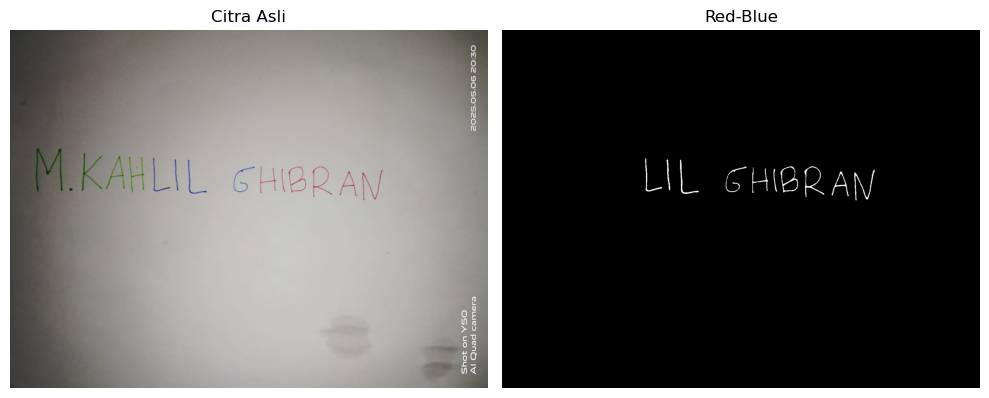

In [9]:
image = cv2.imread('Foto Nama.jpg')

color_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)

mask_red = cv2.bitwise_or(mask_red1, mask_red2)

mask_combined = cv2.bitwise_or(mask_blue, mask_red)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(color_image_rgb)
axs[0].set_title('Citra Asli')
axs[0].axis('off')  

axs[1].imshow(mask_combined, cmap='gray')
axs[1].set_title('Red-Blue')
axs[1].axis('off') 

plt.tight_layout()
plt.show()

# Ambang Batas Red-Green-Blue

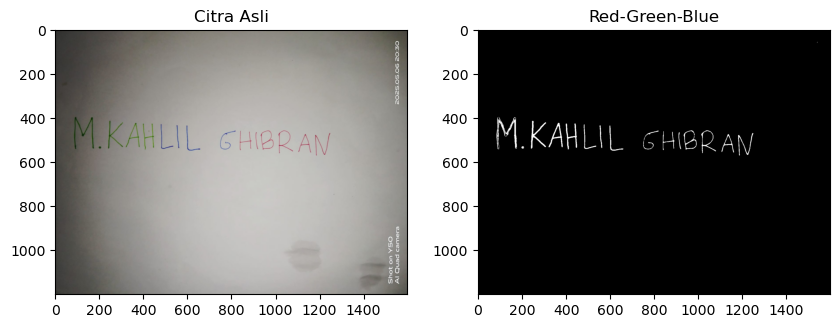

In [10]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_green = cv2.inRange(hsv, lower_green, upper_green)

mask_combined = cv2.bitwise_or(mask_blue, mask_red1)
mask_combined = cv2.bitwise_or(mask_combined, mask_red2)
mask_combined = cv2.bitwise_or(mask_combined, mask_green)

hasil = cv2.bitwise_and(image, image, mask=mask_combined)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')

axs[1].imshow(mask_combined, cmap='gray')
axs[1].set_title('Red-Green-Blue')

plt.show()

# Ambang Batas None

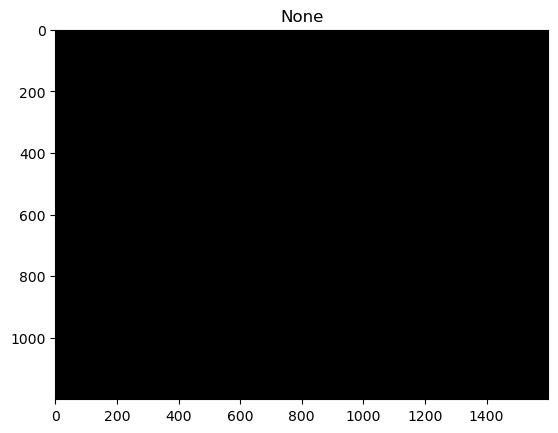

In [11]:
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('on')
    plt.show()

hsv_image = cv2.imread('Foto Nama.jpg', cv2.IMREAD_COLOR)
hsv_image = cv2.cvtColor(hsv_image, cv2.COLOR_BGR2HSV)

lower_blue = np.array([100, 50, 50])   
upper_blue = np.array([130, 255, 255])

lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255]) 

lower_green = np.array([50, 50, 50])
upper_green = np.array([80, 255, 255])

blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

red_blue_mask = cv2.bitwise_or(red_mask1, red_mask2)
combined_mask = cv2.bitwise_or(blue_mask, cv2.bitwise_or(red_blue_mask, green_mask))

black_image = np.zeros_like(hsv_image, dtype=np.uint8)

black_detected_image = cv2.bitwise_and(black_image, black_image, mask=combined_mask)

display_image(black_detected_image, "None")

# Hasil Semuanya

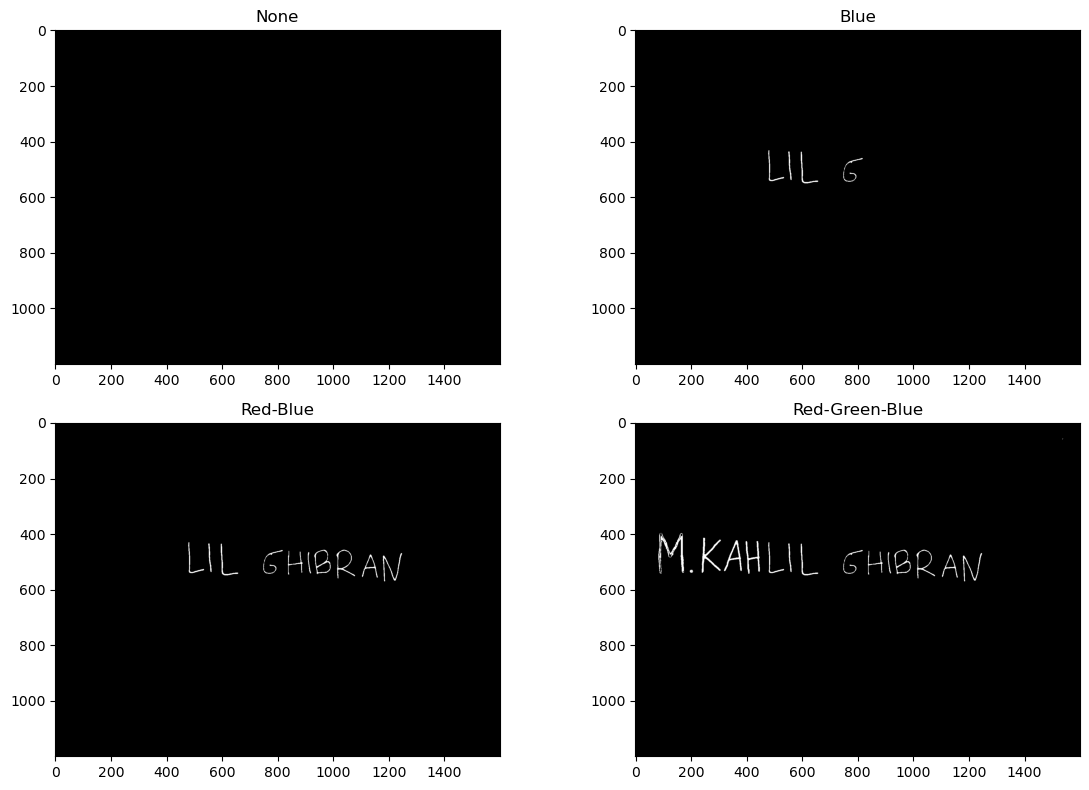

In [12]:
    mask_red_blue = cv2.bitwise_or(mask_red, mask_blue)
    
    mask_combined = cv2.bitwise_or(mask_red_blue, mask_green)
    
    combined_mask = mask_combined
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    
    axs[0, 0].imshow(cv2.bitwise_and(black_image, black_image, mask=combined_mask))
    axs[0, 0].set_title('None')
    
    axs[0, 1].imshow(mask_blue, cmap='gray')
    axs[0, 1].set_title('Blue')
    
    axs[1, 0].imshow(mask_red_blue, cmap='gray')
    axs[1, 0].set_title('Red-Blue')
    
    axs[1, 1].imshow(mask_combined, cmap='gray')
    axs[1, 1].set_title('Red-Green-Blue')

    for ax in axs.flat:
        ax.axis('on')
    
    plt.tight_layout()
    plt.show()

# Nomor 3

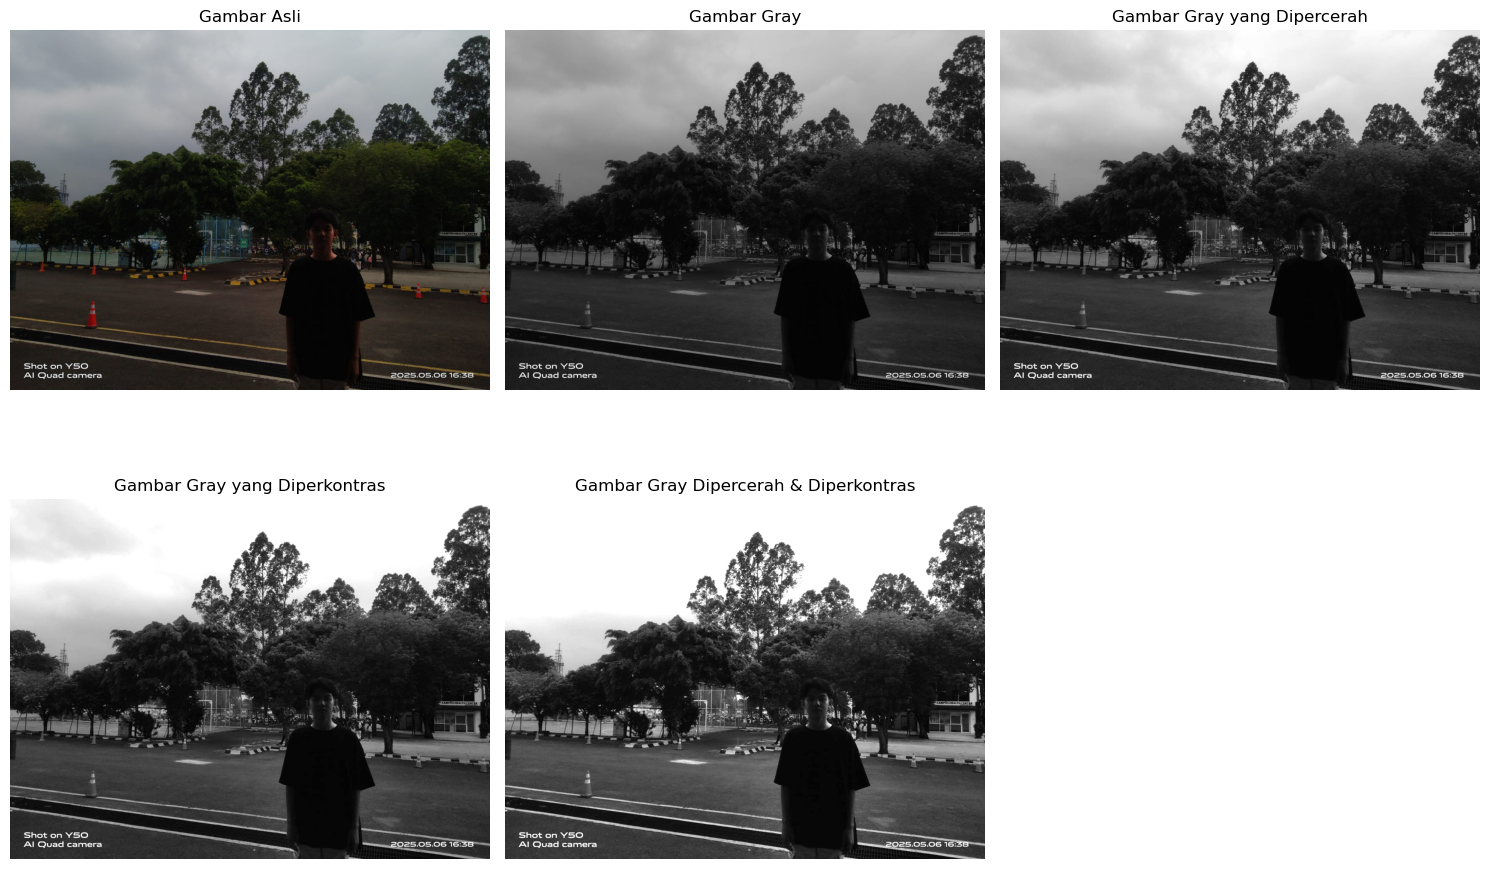

In [13]:
path = "Foto Diri.jpg"
img = cv2.imread(path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

bright_gray = cv2.convertScaleAbs(img_gray, alpha=1, beta=50) 

contrast_gray = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)  

bright_contrast_gray = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=50)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Gambar Gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(bright_gray, cmap='gray')
plt.title("Gambar Gray yang Dipercerah")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(contrast_gray, cmap='gray')
plt.title("Gambar Gray yang Diperkontras")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(bright_contrast_gray, cmap='gray')
plt.title("Gambar Gray Dipercerah & Diperkontras")
plt.axis("off")

plt.tight_layout()
plt.show()